# SVM Para la deteccion de numeros escritos a mano
Se entrena el modelo con imágenes preprocesadas (matrices de píxeles a vectores) y se aplica un kernel para manejar datos no lineales. El objetivo es identificar correctamente números del 0 al 9, evaluando el desempeño mediante métricas de precisión y exactitud.


In [1]:
# Manipulación de datos
import pandas as pd
# Operaciones numéricas
import numpy as np
# Para medición del tiempo que toma ejecutar los procesos
from time import time
# Para separar datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
# Librería para SVM
from sklearn.svm import SVC
# Medición de precisión
from sklearn.metrics import accuracy_score, confusion_matrix
# Generar gráficos
import matplotlib.pyplot as plt

# Nuevo
from sklearn.metrics import confusion_matrix


In [3]:
# Leemos el set de datos y lo cargamos en la variable df, que es un DataFrame de pandas
df = pd.read_csv('digitos.csv')
# Mostrar información sobre el set de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


Siempre es recomendable explorar el set de datos antes de realizar un análisis sobre el mismo. En este caso, simplemente mostraremos los primeros cinco registros para conocer cómo se componen.

In [4]:
# Consultar los primeros registros del set de datos
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df['label'].value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

<Axes: >

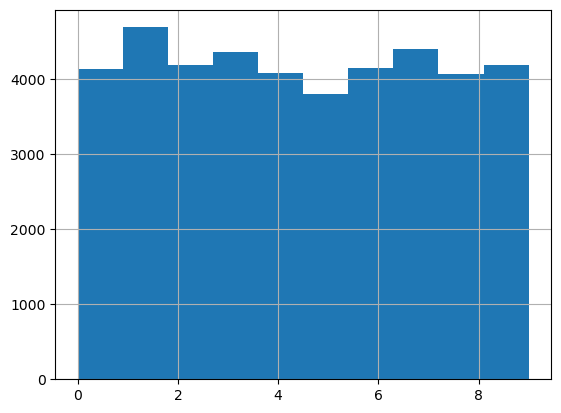

In [6]:
df['label'].hist()

In [7]:
# Obtener una seccion del Dataframe usando los numeros de columna
pixeles = df.iloc[:,1:785] # x
digitos = df.iloc[:,0:1] # y

Separacion de los datos en **X**, **Y** donde X son los pixeles y Y es el numero correspondiente

In [8]:
# Separar datos para entrenar y para probar
X_train, X_test, y_train, y_test = train_test_split(
    pixeles,
    digitos,
    test_size=0.5
)

In [9]:
# Consultar informacion de la muestra de entrenamiento
X_train.shape
# Los datos mostrados son el numero de columnas y registros

(21000, 784)

In [10]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
704,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37792,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30209,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37729,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
def mostrar_num(in_data):
    """Genera un grafico que muestra un registro
    del set de datos.
    Para ello, convierte el array de 1 dimension en
    una matriz de 28x28.
    """
    matriz = np.array(in_data.values)
    plt.imshow(matriz.reshape(28, 28))

In [12]:
X_test.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
3327,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28301,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36511,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29470,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
660,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24963,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


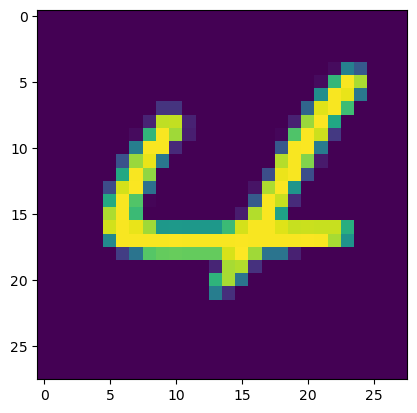

In [13]:
mostrar_num(X_test.iloc[4])

In [14]:
#Creacion del modelo 
modelo = SVC(kernel='linear')

In [15]:
# Entrenamiento 
hora_inicio = time()
modelo.fit(X_train.values, y_train.values.ravel())
print('Entrenamiento terminado en {}'.format(time() - hora_inicio))

Entrenamiento terminado en 54.517669439315796


In [16]:
# Crear prediccion de datos
hora_inicio = time()
y_pred = modelo.predict(X_test.values)
print('Prediccion terminada en {}'.format(time() - hora_inicio))
print(y_pred.shape)

Prediccion terminada en 48.156686782836914
(21000,)


In [19]:
precision = accuracy_score(y_test, y_pred)
print(f'Precision: {precision}')


Precision: 0.9084761904761904


El resultado era: label    7
Name: 10249, dtype: int64
El digito es: [7]


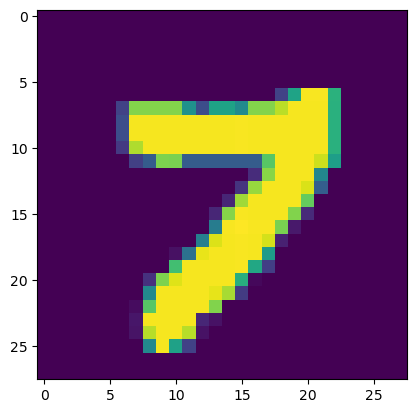

In [27]:
prueba = X_test.iloc[1100] #ILOC PARA LOCACION ESPECIFICA DE UN VALOR
print(f'El resultado era: {y_test.iloc[120]}')
mostrar_num(prueba)
prediccion = modelo.predict([prueba])
print(f'El digito es: {prediccion}')

In [21]:
# Prueba con la matriz de confusion
conf = confusion_matrix(y_test, y_pred)

In [22]:
conf

array([[2006,    0,    5,    5,    1,   16,   16,    2,    7,    3],
       [   1, 2238,   10,    3,    4,    3,    3,    3,   19,    2],
       [  15,   30, 1871,   43,   26,   11,   19,   15,   25,    4],
       [  13,   22,   64, 1938,    1,   79,    7,   16,   38,   11],
       [   9,    7,   22,    2, 1983,    3,   14,    6,    6,   73],
       [  25,   17,   23,  122,   18, 1633,   20,    3,   41,   11],
       [  20,    3,   23,    3,   14,   38, 1946,    1,    7,    1],
       [   5,   13,   34,   14,   18,    2,    2, 2006,    3,  100],
       [  11,   46,   48,  122,   12,   67,   10,   14, 1668,   14],
       [  10,   10,   17,   23,  105,   18,    0,  106,   24, 1789]],
      dtype=int64)

In [39]:
def plot_cm(cm, classes):
    """Esta funcion se encarga de generar un grafico con nuestra matriz de confusion.
    cm es la matriz fenerada por confusion_matrix
    classes es una lista que contiene las posibles clases que puede predecir nuestro modelo
    """
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title('Matriz de confusion')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for indice_fila, fila in enumerate(cm):
        for indice_columna, columna in enumerate(fila):
            if cm[indice_fila, indice_columna] > thresh:
                color = "white"
            else:
                color = "black"
            plt.text(
                indice_columna,
                indice_fila,
                cm[indice_fila, indice_columna],
                color=color,
                horizontalalignment="center"
            )
    plt.ylabel("Valores reales") 
    plt.xlabel("Valores calculados")
    plt.show()
    

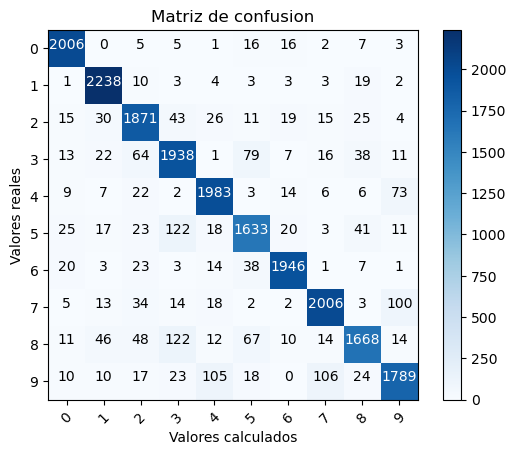

In [40]:
plot_cm(conf, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Regresion

In [ ]:
Los datos que deseamos predecir no siempre se encuentra limitados a un conjunto de clases predeterminado. Para esos casos,  no se puede utilizar un problema de clasificacion puesto que la cantidad de clases tendria que ser infinita 